## Importing Libraries

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Connect to PostgreSQL database

In [2]:
conn = psycopg2.connect("dbname=eda_project user=postgres password=1234")
cursor = conn.cursor()

### Number of accidents by severity

In [3]:
query_1 = """
SELECT accident_severity, COUNT(*) AS total_accidents
FROM accidents
GROUP BY accident_severity
ORDER BY total_accidents DESC;
"""
accidents_by_severity = pd.read_sql_query(query_1, conn)
print(accidents_by_severity)

  accident_severity  total_accidents
0            Slight           263280
1           Serious            40740
2             Fatal             3953


C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\1498414233.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  accidents_by_severity = pd.read_sql_query(query_1, conn)


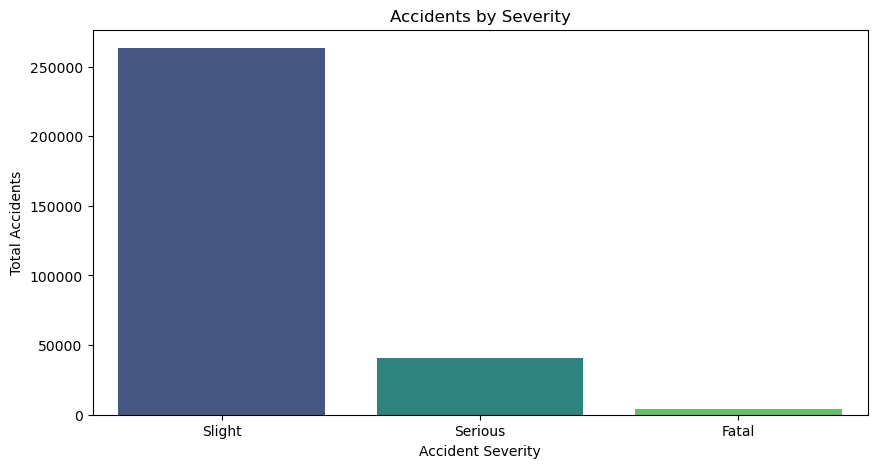

In [4]:
plt.figure(figsize=(10, 5))
sns.barplot(x="accident_severity", y="total_accidents", data=accidents_by_severity, palette="viridis")
plt.title("Accidents by Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Total Accidents")
plt.show()

### Most common accident day

In [5]:
query_2 = """
SELECT day_of_week, COUNT(*) AS accident_count
FROM accidents
GROUP BY day_of_week
ORDER BY accident_count DESC;
"""
most_common_accident_day = pd.read_sql_query(query_2, conn)
print(most_common_accident_day)

  day_of_week  accident_count
0      Friday           50529
1     Tuesday           46386
2   Wednesday           46381
3    Thursday           45649
4      Monday           43918
5    Saturday           41566
6      Sunday           33544


C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\1823963024.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  most_common_accident_day = pd.read_sql_query(query_2, conn)


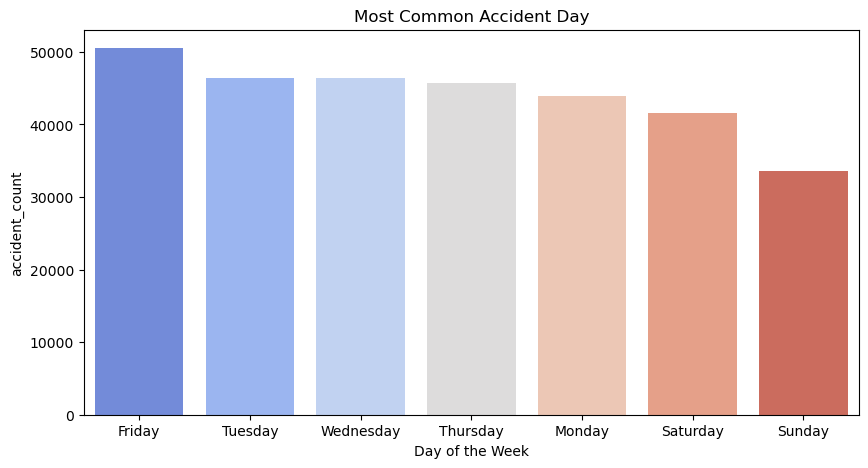

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x="day_of_week", y="accident_count", data=most_common_accident_day, palette="coolwarm")
plt.title("Most Common Accident Day")
plt.xlabel("Day of the Week")
plt.show()

### Top 5 vehicle types involved in accidents

In [7]:
query_3 = """
SELECT vehicle_type, COUNT(*) AS count
FROM accidents
GROUP BY vehicle_type
ORDER BY count DESC
LIMIT 5;
"""
top_vehicle_types = pd.read_sql_query(query_3, conn)
print(top_vehicle_types)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\1512480128.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_vehicle_types = pd.read_sql_query(query_3, conn)


                           vehicle_type   count
0                                   Car  239794
1   Van / Goods 3.5 tonnes mgw or under   15695
2                 Motorcycle over 500cc   11226
3  Bus or coach (17 or more pass seats)    8686
4            Motorcycle 125cc and under    6852


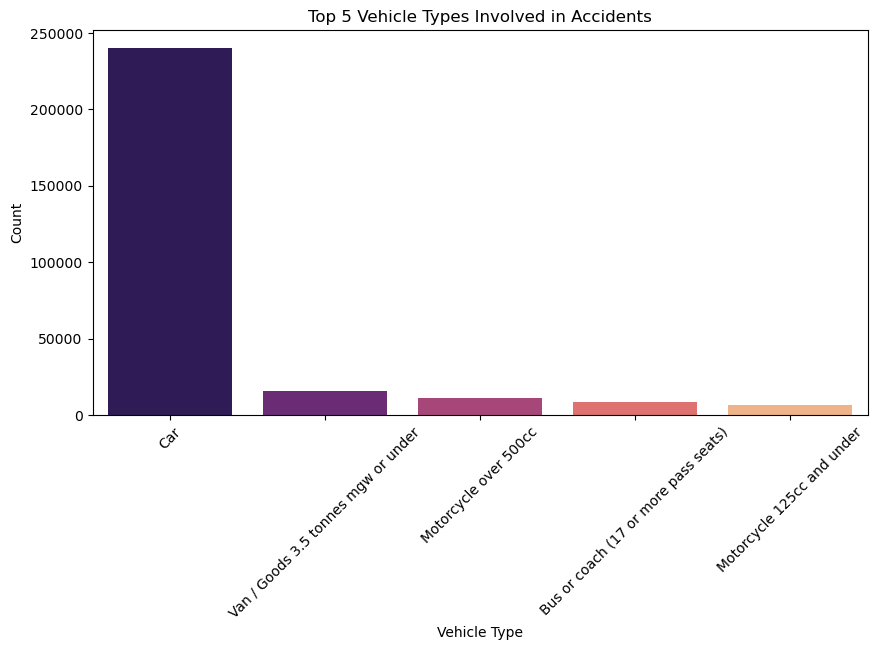

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(x="vehicle_type", y="count", data=top_vehicle_types, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 5 Vehicle Types Involved in Accidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()

### Number of accidents per road type

In [9]:
query_4 = """
SELECT road_type, COUNT(*) AS total_accidents
FROM accidents
GROUP BY road_type
ORDER BY total_accidents DESC;
"""
accidents_by_road_type = pd.read_sql_query(query_4, conn)
print(accidents_by_road_type)

            road_type  total_accidents
0  Single carriageway           230612
1    Dual carriageway            45467
2          Roundabout            20929
3      One way street             6197
4           Slip road             4768


C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\1254903790.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  accidents_by_road_type = pd.read_sql_query(query_4, conn)


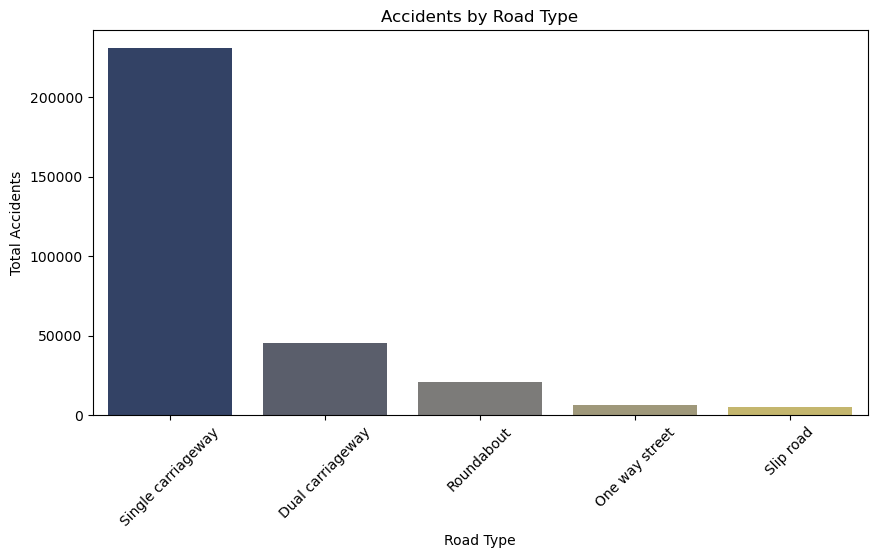

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x="road_type", y="total_accidents", data=accidents_by_road_type, palette="cividis")
plt.xticks(rotation=45)
plt.title("Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Total Accidents")
plt.show()

### Most common weather conditions for accidents

In [11]:
query_5 = """
SELECT weather_conditions, COUNT(*) AS total_accidents
FROM accidents
GROUP BY weather_conditions
ORDER BY total_accidents DESC;
"""
accidents_by_weather = pd.read_sql_query(query_5, conn)
print(accidents_by_weather)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\629868198.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  accidents_by_weather = pd.read_sql_query(query_5, conn)


      weather_conditions  total_accidents
0     Fine no high winds           244496
1  Raining no high winds            37841
2                  Other             8802
3  Snowing no high winds             4839
4            Fog or mist             4783
5   Raining + high winds             3526
6      Fine + high winds             3148
7   Snowing + high winds              538


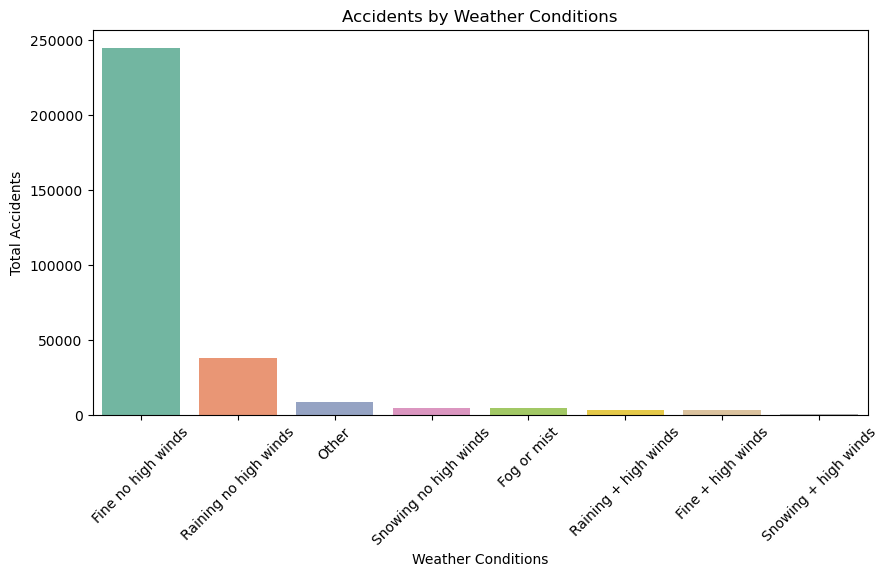

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x="weather_conditions", y="total_accidents", data=accidents_by_weather, palette="Set2")
plt.xticks(rotation=45)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Total Accidents")
plt.show()

### Accident counts for urban vs rural areas

In [13]:
query_6 = """
SELECT urban_or_rural_area, COUNT(*) AS total_accidents
FROM accidents
GROUP BY urban_or_rural_area;
"""
urban_vs_rural_accidents = pd.read_sql_query(query_6, conn)
print(urban_vs_rural_accidents)

  urban_or_rural_area  total_accidents
0               Rural           109441
1               Urban           198532


C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\3132171487.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  urban_vs_rural_accidents = pd.read_sql_query(query_6, conn)


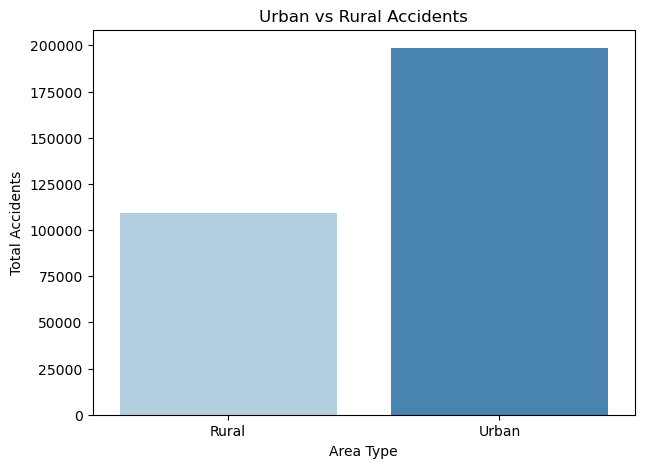

In [14]:
plt.figure(figsize=(7, 5))
sns.barplot(x="urban_or_rural_area", y="total_accidents", data=urban_vs_rural_accidents, palette="Blues")
plt.title("Urban vs Rural Accidents")
plt.xlabel("Area Type")
plt.ylabel("Total Accidents")
plt.show()

### Average number of casualties per accident severity

In [15]:
query_7 = """
SELECT accident_severity, AVG(number_of_casualties) AS avg_casualties
FROM accidents
GROUP BY accident_severity
ORDER BY avg_casualties DESC;
"""
avg_casualties_by_severity = pd.read_sql_query(query_7, conn)
print(avg_casualties_by_severity)

  accident_severity  avg_casualties
0             Fatal        1.804958
1           Serious        1.455866
2            Slight        1.334837


C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\2446790549.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_casualties_by_severity = pd.read_sql_query(query_7, conn)


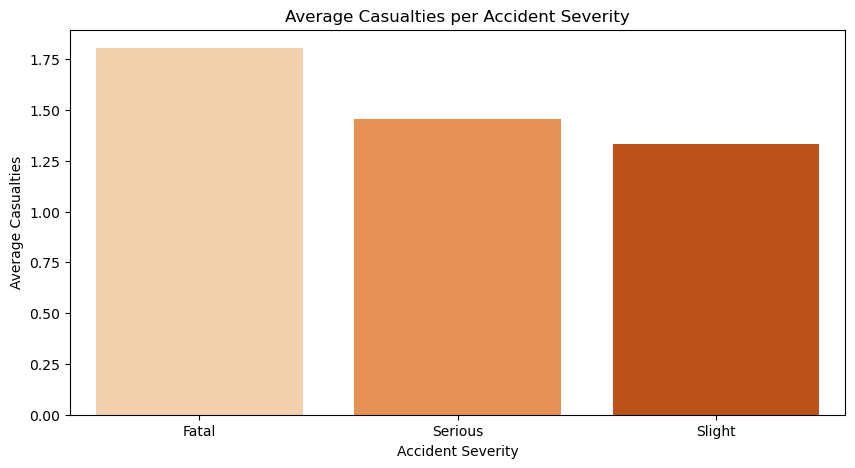

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x="accident_severity", y="avg_casualties", data=avg_casualties_by_severity, palette="Oranges")
plt.title("Average Casualties per Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Average Casualties")
plt.show()

### Most common junction type where accidents occur

In [17]:
query_8 = """
SELECT junction_detail, COUNT(*) AS accident_count
FROM accidents
GROUP BY junction_detail
ORDER BY accident_count DESC
LIMIT 5;
"""
common_junction_types = pd.read_sql_query(query_8, conn)
print(common_junction_types)

                       junction_detail  accident_count
0  Not at junction or within 20 metres          123094
1              T or staggered junction           96718
2                           Crossroads           29948
3                           Roundabout           27264
4            Private drive or entrance           10875


C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\3507358050.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  common_junction_types = pd.read_sql_query(query_8, conn)


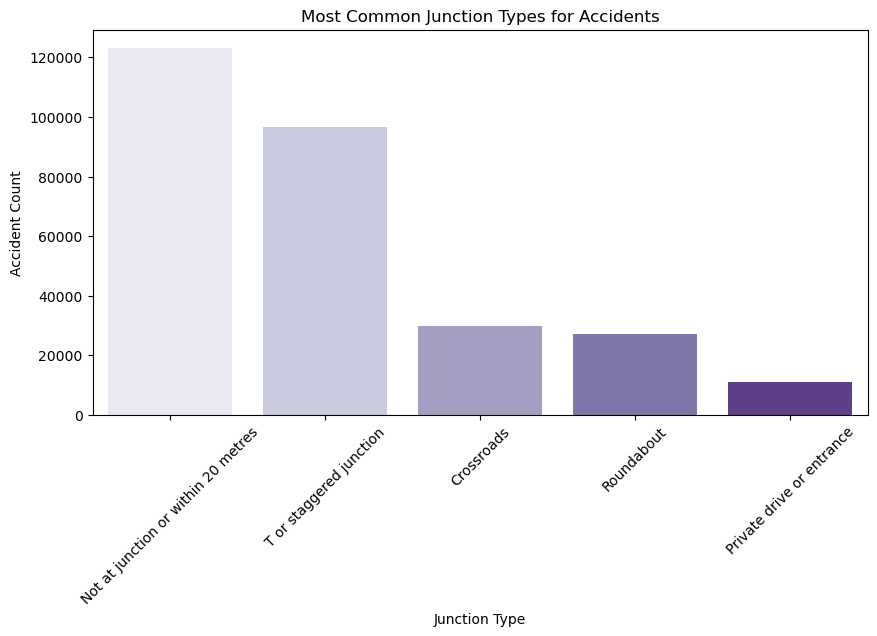

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x="junction_detail", y="accident_count", data=common_junction_types, palette="Purples")
plt.xticks(rotation=45)
plt.title("Most Common Junction Types for Accidents")
plt.xlabel("Junction Type")
plt.ylabel("Accident Count")
plt.show()

### Number of accidents per speed limit category

In [19]:
query_9 = """
SELECT speed_limit, COUNT(*) AS total_accidents
FROM accidents
GROUP BY speed_limit
ORDER BY speed_limit;
"""
accidents_by_speed_limit = pd.read_sql_query(query_9, conn)
print(accidents_by_speed_limit)

   speed_limit  total_accidents
0           10                3
1           15                2
2           20             2899
3           30           200040
4           40            25650
5           50            10191
6           60            46826
7           70            22362


C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\2811201743.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  accidents_by_speed_limit = pd.read_sql_query(query_9, conn)


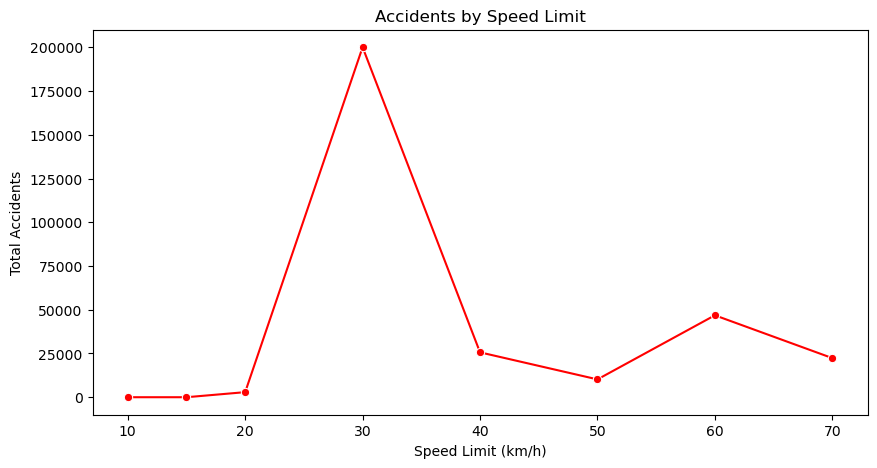

In [20]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="speed_limit", y="total_accidents", data=accidents_by_speed_limit, marker="o", color="red")
plt.title("Accidents by Speed Limit")
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Total Accidents")
plt.show()

### Time period with the most accidents

In [21]:
query_10 = """
SELECT EXTRACT(HOUR FROM time::time) AS accident_hour, COUNT(*) AS accident_count
FROM accidents
GROUP BY accident_hour
ORDER BY accident_count DESC;
"""
accidents_by_time_period = pd.read_sql_query(query_10, conn)
print(accidents_by_time_period)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12992\2058523266.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  accidents_by_time_period = pd.read_sql_query(query_10, conn)


    accident_hour  accident_count
0            17.0           26964
1            16.0           24903
2            15.0           24151
3             8.0           22552
4            18.0           21063
5            14.0           19067
6            13.0           18971
7            12.0           18342
8            11.0           16141
9            19.0           15851
10            9.0           15560
11           10.0           13791
12            7.0           12560
13           20.0           11402
14           21.0            9443
15           22.0            8146
16           23.0            6400
17            6.0            5274
18            0.0            4667
19            1.0            3533
20            2.0            2652
21            5.0            2491
22            3.0            2311
23            4.0            1721
24            NaN              17


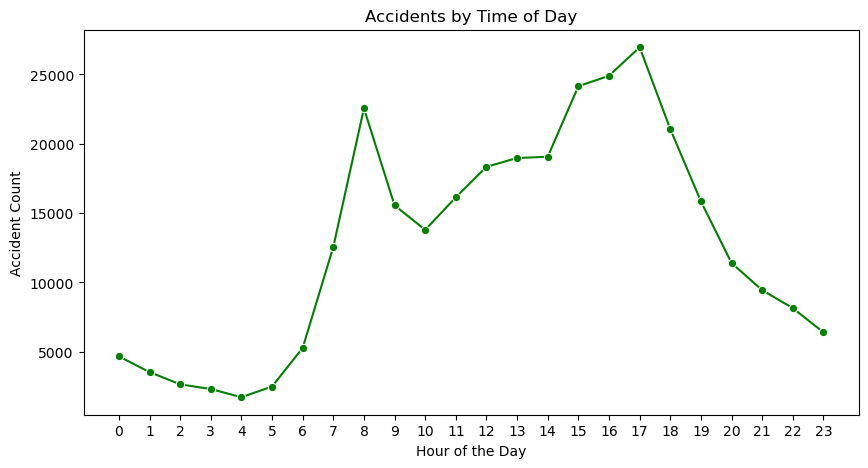

In [22]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="accident_hour", y="accident_count", data=accidents_by_time_period, marker="o", color="green")
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Accident Count")
plt.xticks(range(0, 24))
plt.show()

In [23]:
conn.close()